### import das libs principais

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb

### Rodando a base

In [78]:
data_frame = pd.read_excel('/home/renan/Documentos/python/machine_learning project/base/dados_tratados_heart.xlsx', "heart")

### Primeiros Dados

In [79]:
data_frame.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,2,172,0,0,1,0
1,49,0,3,160,180,0,2,156,0,1,2,1
2,37,1,2,130,283,0,3,98,0,0,1,0
3,48,0,1,138,214,0,2,108,1,15,2,1
4,54,1,3,150,195,0,2,122,0,0,1,0


### Ultimos dados

In [80]:
data_frame.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,1,4,110,264,0,2,132,0,12,2,1
914,68,1,1,144,193,1,2,141,0,34,2,1
915,57,1,1,130,131,0,2,115,1,12,2,1
916,57,0,2,130,236,0,1,174,0,0,2,1
917,38,1,3,138,175,0,2,173,0,0,1,0


### Informações Gerais

In [81]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             918 non-null    int64
 1   Sex             918 non-null    int64
 2   ChestPainType   918 non-null    int64
 3   RestingBP       918 non-null    int64
 4   Cholesterol     918 non-null    int64
 5   FastingBS       918 non-null    int64
 6   RestingECG      918 non-null    int64
 7   MaxHR           918 non-null    int64
 8   ExerciseAngina  918 non-null    int64
 9   Oldpeak         918 non-null    int64
 10  ST_Slope        918 non-null    int64
 11  HeartDisease    918 non-null    int64
dtypes: int64(12)
memory usage: 86.2 KB


### Análise Descritiva

In [82]:
data_frame.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,1.781046,132.396514,198.799564,0.233115,1.989107,136.809368,0.404139,5.393246,1.638344,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,8.774345,0.607056,0.497414
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,60.000000,0.000000,-26.000000,1.000000,0.000000
25%,47.000000,1.000000,1.000000,120.000000,173.250000,0.000000,2.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,223.000000,0.000000,2.000000,138.000000,0.000000,1.000000,2.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,267.000000,0.000000,2.000000,156.000000,1.000000,8.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,3.000000,202.000000,1.000000,62.000000,3.000000,1.000000


### Alguns gráficos

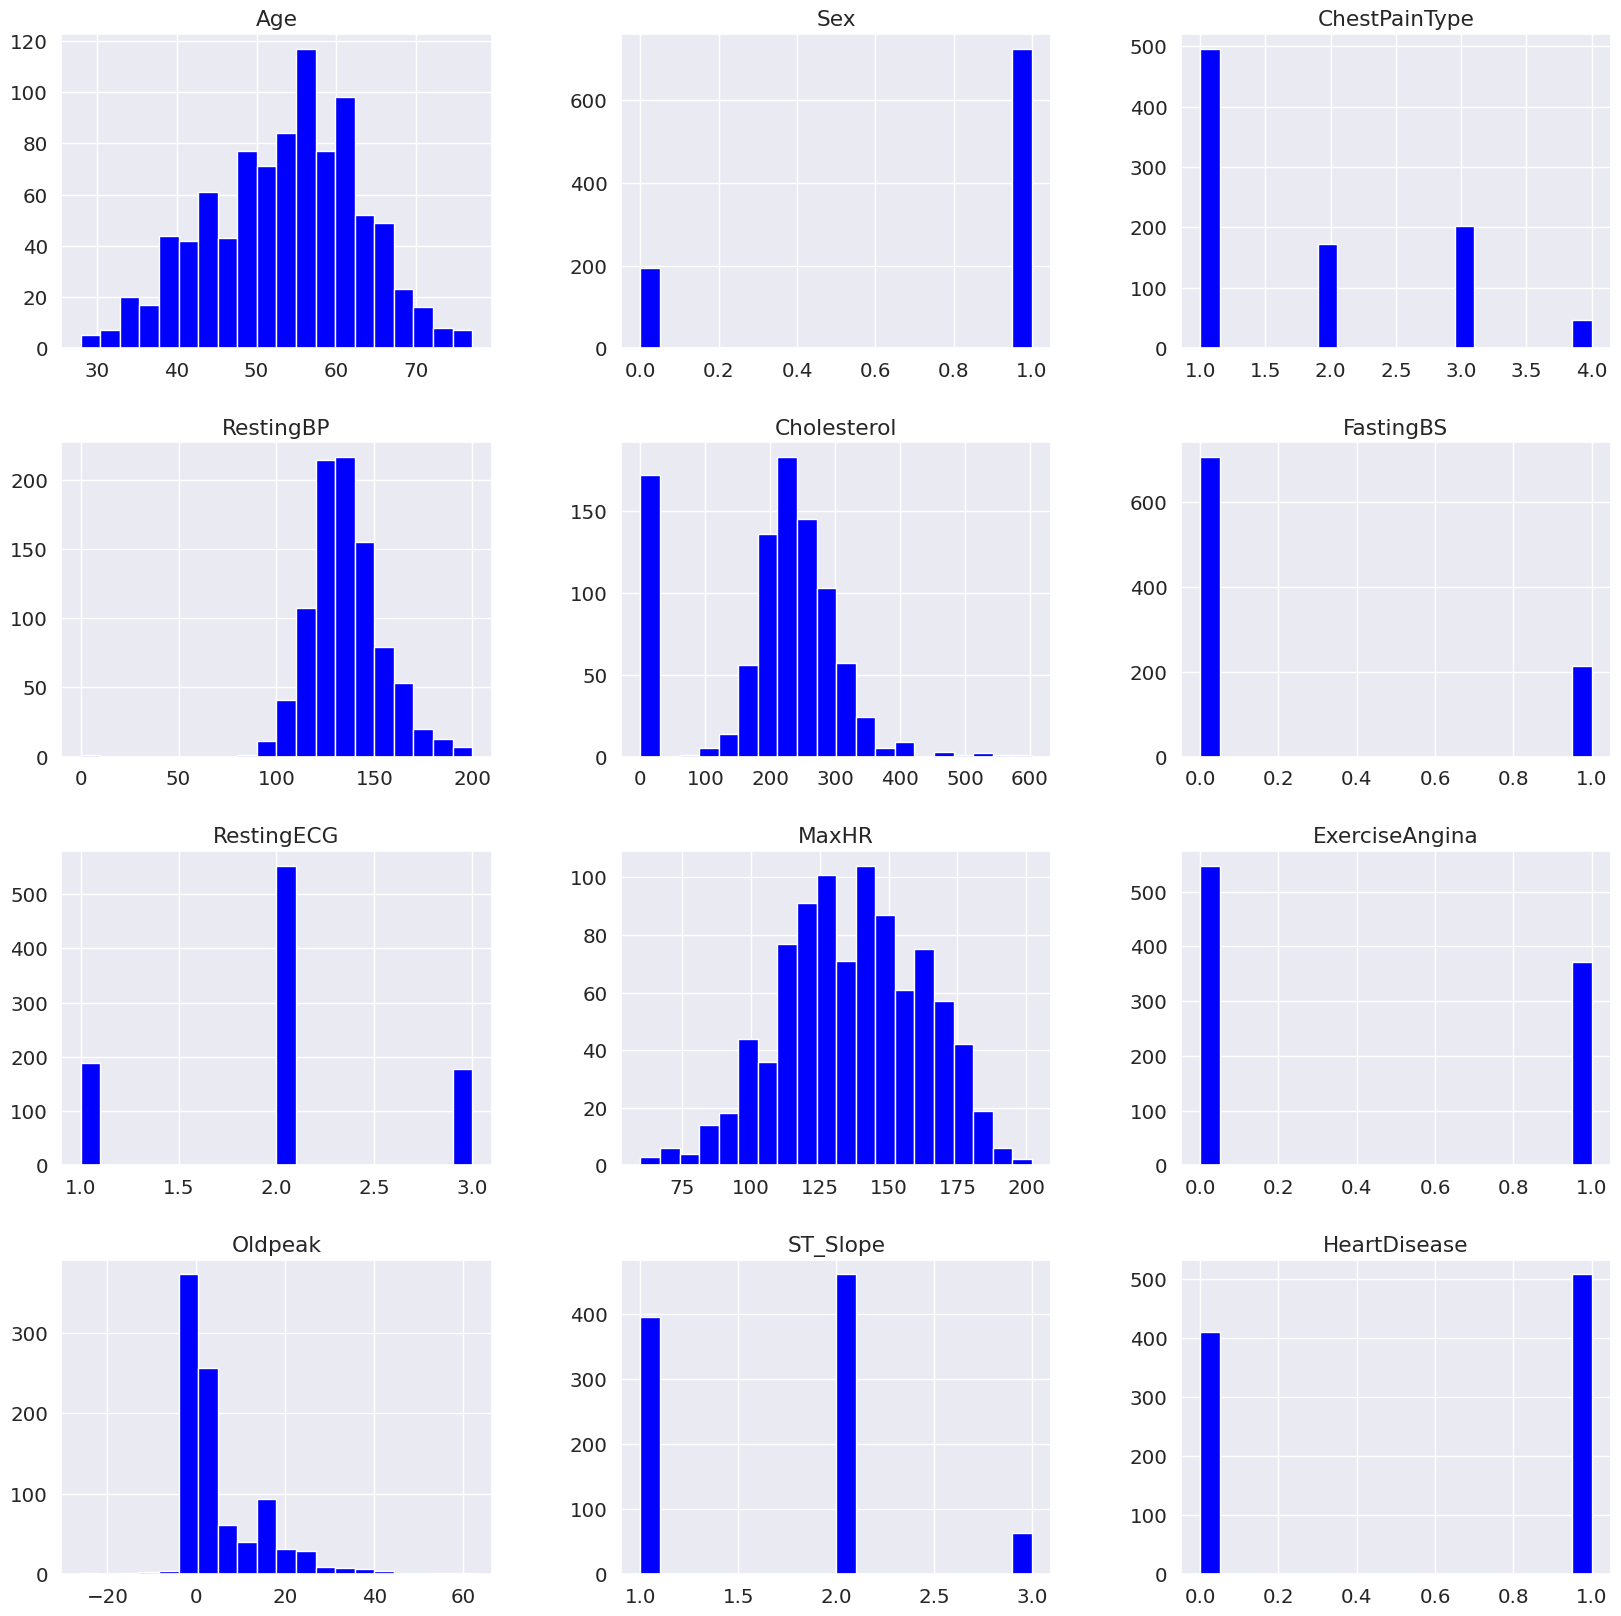

In [83]:
snb.set_theme(font_scale=1.3, rc={'figure.figsize': (20, 20)})
eixo = data_frame.hist(bins=20, color='blue')

<Axes: xlabel='HeartDisease', ylabel='Age'>

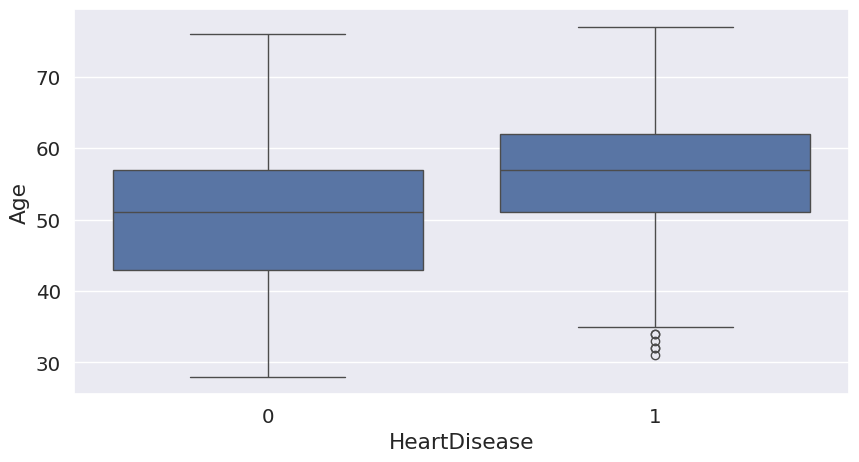

In [84]:
plt.figure(figsize=(10, 5))
snb.boxplot(data=data_frame, x='HeartDisease', y='Age')

<Axes: xlabel='Oldpeak', ylabel='HeartDisease'>

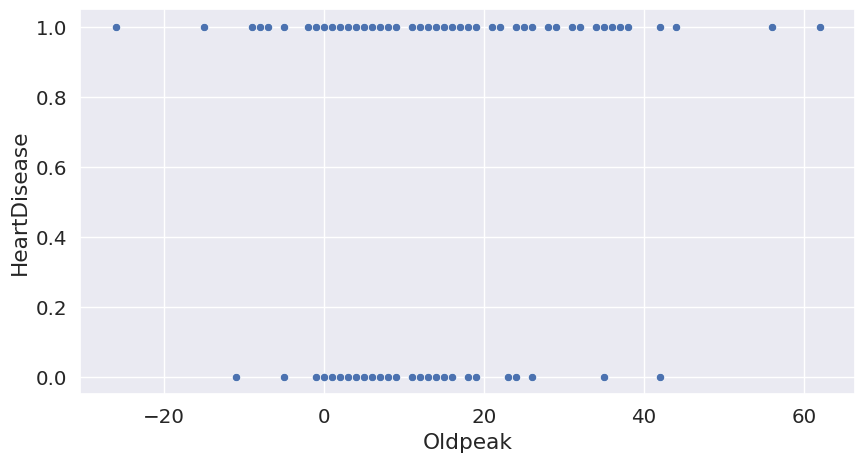

In [85]:
plt.figure(figsize=(10, 5))
snb.scatterplot(data=data_frame, x='Oldpeak', y='HeartDisease')

### Aplicando modelo

In [86]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as treinoteste

x_caracteristicas = data_frame.iloc[:, :32].values
y_previsor = data_frame.iloc[:, 11].values

* Gerando variáveis de treinamento

In [87]:
x_treino, x_teste, y_treino, y_teste = treinoteste(x_caracteristicas, y_previsor, test_size=0.6)

* Treinando modelo

In [88]:
svm_model = SVC(kernel='rbf')
svm_model.fit(x_treino, y_treino)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


* Realizamdo previsões

In [89]:
previssoes = svm_model.predict(x_teste)

In [90]:
previssoes

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,

### Avaliando modelo

In [91]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_teste, previssoes)

array([[196,  48],
       [ 98, 209]])

In [92]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, previssoes))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73       244
           1       0.81      0.68      0.74       307

    accuracy                           0.74       551
   macro avg       0.74      0.74      0.73       551
weighted avg       0.75      0.74      0.74       551

